# MLP 2023 Term 2 OPPE 2

To be filled before the exam starts:

**Exam Name**: MLP OPPE 2

**Name of the student:** SAISAMARTH TALURI

**Roll No. of the student:** 21f1005712

**Date:** 27 Aug 2023


### Q. 1: Which dataset are you using for this exam?

In [ ]:
V1

### Q. 2: Break the dataset into features(X) and label (y), where the column Heart_Disease goes to y and the rest of the columns go to X. What proportion of data points belongs to label 1?

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv("/content/V1.csv")

In [3]:
data.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,2,4.0,1,1,0,1,0,1,0,8,157.0,49.44,1,0,1.0,30.0,30.0,0.0,0
1,3,4.0,1,0,0,0,0,0,0,0,157.0,47.63,1,0,4.0,8.0,2.0,4.0,0
2,4,2.0,0,0,0,0,0,0,0,3,175.0,70.31,1,0,3.0,36.0,8.0,4.0,0
3,4,4.0,1,0,0,0,0,0,1,8,183.0,79.38,1,0,0.0,60.0,30.0,4.0,0
4,1,4.0,1,0,0,0,0,1,1,8,185.0,95.25,2,1,0.0,0.0,0.0,0.0,0


In [4]:
X = data.drop(columns=["Heart_Disease"],axis=1)
y = data["Heart_Disease"]

In [10]:
tot = 0
for i in y:
  if i == 1:
    tot+=1


In [11]:
tot

7342

In [12]:
len(y.values)

12499

In [13]:
proportion = 7342/12499

In [14]:
proportion

0.5874069925594048

### Q. 3: Split the dataset into train and test dataset into the 80:20 ratio while keeping random_state =64. How many examples are there in training dataset?

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [19]:
X_train.shape

(9999, 18)

### Q. 4: Take LogisticRegression estimator with following parameters for training:
Use lbfgs as solver
Set random state to be equal to 64
Tolerance for stopping criteria to be 1e-4
inverse of regularization parameter, C = 0.1
Maximum number of iterations taken for the solvers to converge to be 100
Enter the f1 score for the given model using test set(X_test, y_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression(random_state=64, solver ='lbfgs', tol = 1e-4, C = 0.1, max_iter = 100 ).fit(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_test, y_pred)

0.8877920368542285

### Q. 5: What is the intercept (bias term in the decision function) learnt by the above model?

In [35]:
clf.intercept_

array([-0.10020701])

### Q. 6: Take LogisticRegression(random_state = 64) estimator with GridSearchCV. Hyperparameter tuning to be done over the following parameters:

solver as 'lbfgs' or 'sag'

Maximum number of iterations taken for the solver to converge to be [100, 200, 500]

value of inverse reularization parameter C to be [0.01, 0.1, 1, 10]

Use cross validation = 4

Use the best model from above hyper parameter tuning process to answer following questions:


Enter the value of C of the best estimator you got after training with GridSearchCV.



In [36]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {'solver':('lbfgs', 'sag'), 'C':[0.01, 0.1, 1, 10], 'max_iter':[100, 200, 500]}

In [40]:
clf_log = LogisticRegression(random_state=64)

In [41]:
grid = GridSearchCV(clf_log, parameters, cv=4)

In [46]:
grid.fit(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=64),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'solver': ('lbfgs', 'sag')})

In [47]:
grid.best_estimator_

LogisticRegression(C=1, max_iter=500, random_state=64)

### Q. 7:
Enter the value of the precision on the test set using the best model:

In [48]:
from sklearn.metrics import precision_score

In [50]:
y_pred_grid = grid.predict(X_test)

In [52]:
precision_score(y_test, y_pred_grid)

0.8739495798319328

### Q. 8:
Use SGDClassifier on the training dataset (X_train and y_train) to train the model. Use the following parameters:
log_loss is the loss function to be used
apply ridge regularization,
maximum number of iterations is 10
constant learning rate of 0.01,
regularization rate value is 0.001,
Take random_state=64.
Set warm_start as False
Note : Please ignore the convergence warning.

Using above model, calculate and write the correct value of f1_score for the test set.

In [53]:
from sklearn.linear_model import SGDClassifier

In [67]:
clf_sgd = SGDClassifier(loss = "log_loss", penalty = 'l2', max_iter=10, learning_rate='constant', eta0=0.01, alpha=0.001, random_state=64, warm_start=False)

In [68]:
clf_sgd.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=10, random_state=64)

In [69]:
y_pred_sgd = clf_sgd.predict(X_test)

In [70]:
f1_score(y_test, y_pred_sgd)

0.7814323607427056

### Q. 9: Use Gridsearchcv with KNeighborsClassifier estimator, f1 as scoring parameter, cv= 5. Consider [5,7,9,11] as K values to be examined.
Consider following parameters for KNeighborsClassifier:

Use Euclidean distance metric
Keep other parameter values as default values.
What is the best value of K you obtained using the above instructions?

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
clf_knn = KNeighborsClassifier(metric = "euclidean")

In [76]:
parameters = {'n_neighbors':[5,7,9,11]}

In [77]:
grid = GridSearchCV(clf_knn, parameters, cv=5, scoring="f1")

In [78]:
grid.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [5, 7, 9, 11]}, scoring='f1')

In [79]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### Q. 10:
Take DecisionTreeClassifier(random_state = 64) estimator with GridSearchCV. Hyperparameter tuning to be done over the following parameters:

Criterion as 'entropy' or 'gini'

Splitter as 'random' or 'best'

Minimum number of samples per leaf as [6,8,10, 12, 14]

Maximum depth as [5,6, 7, 8]

Minimum number of samples per node to split as [16, 18, 20, 22]

Use cross validation = 3

Use the best model from above hyper parameter tuning process to answer following questions:

What is the depth of the best estimator?

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
clf_dt = DecisionTreeClassifier(random_state=64)

In [83]:
parameters = {'criterion':('entropy','gini'),'splitter':('best','random'),'min_samples_leaf':[6,8,10,12,14],'max_depth':[5,6,7,8]}

In [84]:
grid = GridSearchCV(clf_dt, parameters, cv=3)

In [85]:
grid.fit(X_test, y_test)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [6, 8, 10, 12, 14],
                         'splitter': ('best', 'random')})

In [86]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       random_state=64)

### Q. 11:
Find the number of leaves in the best estimator.

In [87]:
grid.best_estimator_.get_n_leaves()

50

### Q. 12:
Suppose we train a decision tree classifier using the following two approaches:

Approach 1. Do not grow the full size tree by setting the parameters as:

max depth of the tree to be 10.
minimum samples in a node to split to be 50.
Approach 2. Use cost complexity pruning by setting the cost complexity parameter as 0.01.

NOTE:

Use random state to be 64 in both approaches.
Use entropy criterion in both approaches.

Which approach gives the better accuarcy on the test dataset?

In [88]:
clf_dt1 = DecisionTreeClassifier(max_depth = 10, min_samples_split=50)

In [89]:
clf_dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [90]:
y_pred_dt1 = clf_dt1.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
a1 = accuracy_score(y_test,y_pred_dt1)

In [93]:
a1

0.8588

In [94]:
clf_dt2 = DecisionTreeClassifier(ccp_alpha=0.01)

In [95]:
clf_dt2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [99]:
y_pred_dt2 = clf_dt2.predict(X_test)

In [100]:
a2 = accuracy_score(y_test,y_pred_dt2)

In [101]:
a2

0.8284

### Q. 13:
What is the difference (absolute difference) in True Positives (TP) between these two approaches on test datasets?

In [102]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test, y_pred_dt1)

array([[ 824,  199],
       [ 154, 1323]])

In [107]:
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test, y_pred_dt1).ravel()

In [108]:
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test, y_pred_dt2).ravel()

In [110]:
tp_1 - tp_2

71

### Q. 14:
Find the sum of number of nodes of both trees (trees obtained using approach 1 and appoach 2).

In [113]:
from sklearn.tree import plot_tree

In [116]:
from sklearn import tree

[Text(0.5342935794044665, 0.9545454545454546, 'x[0] <= 2.5\ngini = 0.485\nsamples = 9999\nvalue = [4134, 5865]'),
 Text(0.24414547146401985, 0.8636363636363636, 'x[9] <= 5.5\ngini = 0.356\nsamples = 6837\nvalue = [1585, 5252]'),
 Text(0.1054590570719603, 0.7727272727272727, 'x[9] <= 3.5\ngini = 0.41\nsamples = 1143\nvalue = [814, 329]'),
 Text(0.05334987593052109, 0.6818181818181818, 'x[0] <= 1.5\ngini = 0.209\nsamples = 591\nvalue = [521, 70]'),
 Text(0.02481389578163772, 0.5909090909090909, 'x[9] <= 2.5\ngini = 0.349\nsamples = 160\nvalue = [124, 36]'),
 Text(0.01488833746898263, 0.5, 'x[11] <= 90.039\ngini = 0.258\nsamples = 105\nvalue = [89, 16]'),
 Text(0.009925558312655087, 0.4090909090909091, 'x[17] <= 6.184\ngini = 0.395\nsamples = 59\nvalue = [43, 16]'),
 Text(0.004962779156327543, 0.3181818181818182, 'gini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.01488833746898263, 0.3181818181818182, 'gini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(0.019851116625310174, 0.40909

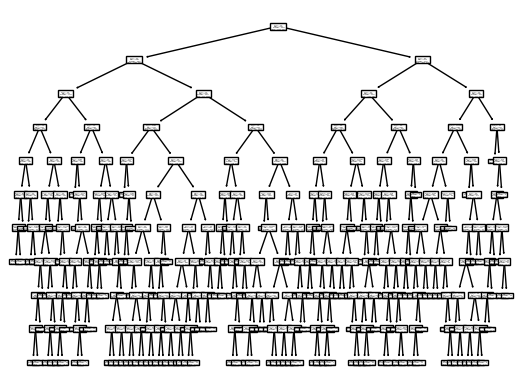

In [117]:
tree.plot_tree(clf_dt1)

### Q. 15:
Take a RandomForestClassifier() model with following hyperparameter values and tune it using GridsearchCV.
Use n_estimators as [10,20,30]
Use max_features as ['sqrt', 'log2']
Use min_impurity_decrease as [0.001, 0.01, 0.1]
Take cv value= 5 and random_state = 64

Calculate the total number of misclassified samples by the best estimator for the test data.

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
clf_RFC = RandomForestClassifier(random_state=64)

In [120]:
parameters = {'n_estimators':[10,20,30],'max_features':('sqrt', 'log2'),'min_impurity_decrease':[0.001, 0.01, 0.1]}

In [122]:
grid = GridSearchCV(clf_RFC, parameters, cv=5)

In [123]:
grid.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=64),
             param_grid={'max_features': ('sqrt', 'log2'),
                         'min_impurity_decrease': [0.001, 0.01, 0.1],
                         'n_estimators': [10, 20, 30]})

In [124]:
grid.best_estimator_

RandomForestClassifier(min_impurity_decrease=0.001, n_estimators=30,
                       random_state=64)

In [125]:
y_pred_RFC = grid.best_estimator_.predict(X_test)

In [127]:
confusion_matrix(y_test, y_pred_RFC)

array([[ 874,  149],
       [  90, 1387]])

In [128]:
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test, y_pred_RFC).ravel()

In [129]:
(tn_1, fp_1, fn_1, tp_1)

(874, 149, 90, 1387)

In [130]:
fp_1+fn_1

239

### Q. 16:
Find the value of min_impurity_decrease of the best estimator?

In [132]:
grid.best_estimator_.min_impurity_decrease

0.001

### Q. 17
Take an adaboost model with following hyperparameter values and tune it using GridsearchCV.
Use n_estimators as [20,30, 50]
Use learning_rate as [0.1, 0.5,1,2]
Take cv value= 5 and random state = 64

Find the accuracy on the test dataset using the best estimator.


In [133]:
from sklearn.ensemble import AdaBoostClassifier

In [135]:
clf_ada = AdaBoostClassifier(random_state=64)

In [136]:
parameters = {'n_estimators':[20,30, 50],'learning_rate': [0.1, 0.5,1,2]}

In [138]:
grid = GridSearchCV(clf_ada, parameters, cv=5)

In [139]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=64),
             param_grid={'learning_rate': [0.1, 0.5, 1, 2],
                         'n_estimators': [20, 30, 50]})

In [141]:
y_pred_ada = grid.best_estimator_.predict(X_test)

In [142]:
accuracy_score(y_test,y_pred_ada)

0.8884

In [146]:
grid.best_estimator_.score(X_test,y_test)

0.8884

### Q.18:
How many class zero examples in the test dataset are correctly classified by the best estimator?

In [147]:
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test, y_pred_ada).ravel()

In [148]:
(tn_1, fp_1, fn_1, tp_1)

(847, 176, 103, 1374)

### Q.19:
Apply GridSearchCV using the support vector machine (SVM) classifier on the training dataset X_train, y_train and calculate the best value of C and kernel from the values below.
use below hyperparameter values to tune the model
`kernel':['linear', 'rbf'],
'C':[ 1, 10]`)
Take cv =3 and random state to be 64
Which of the following options represent the best parameters?


In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
from sklearn.svm import SVC

In [175]:
clf_SVC = SVC(random_state=64)

In [176]:
parameters = {'kernel':('linear', 'rbf'), 'C':[ 1, 10]}

In [177]:
grid = GridSearchCV(clf_SVC, parameters, cv=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_